## IMPORTING LIBRARIES
<p> </p>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## IMPORT DATA
<p></p>

In [2]:
# Read the csv file
data = pd.read_csv('../data/crime.csv', encoding='ISO-8859-1')

## DATASET OVERVIEW
<p></p>

In [3]:
data

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386860,2023534182,2023534182240400,2404,0,theft-of-motor-vehicle,auto-theft,10/3/2023 11:30:00 AM,10/3/2023 3:00:00 PM,10/3/2023 5:40:00 PM,8501 E ALAMEDA AVE,3171584.0,1684914.0,-104.890099,39.712310,3,321,lowry-field,1,0,1
386861,2023534279,2023534279260900,2609,0,fraud-by-use-of-computer,white-collar-crime,9/27/2023 11:00:00 AM,NaN,10/3/2023 6:34:00 PM,517 E BAYAUD AVE,3146000.0,1685678.0,-104.981021,39.714843,3,311,speer,1,0,1
386862,2023533509,2023533509131506,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023 10:44:00 AM,NaN,10/3/2023 12:03:00 PM,N JOLIET ST / E 55TH AVE,3179460.0,1715407.0,-104.861343,39.795869,5,511,montbello,1,0,1
386863,2023533048,2023533048131506,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023 5:30:00 AM,NaN,10/3/2023 9:47:00 AM,585 S ALTON WAY,3173405.0,1682706.0,-104.883680,39.706214,3,321,windsor,1,0,1


In [4]:
data.dtypes

incident_id                 int64
offense_id                  int64
offense_code                int64
offense_code_extension      int64
offense_type_id            object
offense_category_id        object
first_occurrence_date      object
last_occurrence_date       object
reported_date              object
incident_address           object
geo_x                     float64
geo_y                     float64
geo_lon                   float64
geo_lat                   float64
district_id                object
precinct_id                 int64
neighborhood_id            object
is_crime                    int64
is_traffic                  int64
victim_count                int64
dtype: object

In [5]:
data['is_crime'].value_counts()

is_crime
1    386865
Name: count, dtype: int64

<b>is_crime only consist of 1 value</b>

In [6]:
data['is_traffic'].value_counts()

is_traffic
0    386865
Name: count, dtype: int64

<b>is_traffic also consist of 1 value</b>

In [7]:
data.victim_count.value_counts()

victim_count
1     381901
2       3594
3        732
4        274
5        167
6         81
7         50
8         27
9         13
14         5
10         5
11         4
13         4
12         3
16         2
15         1
17         1
19         1
Name: count, dtype: int64

In [8]:
# Checking whether incident_id is unique
data.incident_id.value_counts()

incident_id
2023171905    8
2020498096    7
2023421058    6
2019371467    6
2020613268    6
             ..
2018662312    1
201970920     1
2020179065    1
2018113456    1
2023532323    1
Name: count, Length: 362260, dtype: int64

<b>Incident ID is not unique, thus cannot be as index</b>

In [9]:
data.neighborhood_id.value_counts()

neighborhood_id
five-points     23074
central-park    17864
capitol-hill    14655
cbd             14651
dia             14642
                ...  
skyland          1155
rosedale         1100
country-club      887
indian-creek      718
wellshire         381
Name: count, Length: 78, dtype: int64

<b>Neighbourhood ID is not unique, thus cannot be index</b>

In [10]:
# Checking whether offense_id is unique
data.offense_id.value_counts()

offense_id
202268791299900      1
2020539776239901     1
20216011503239901    1
20206011664239901    1
20206009519239901    1
                    ..
2021401770131500     1
2020535307131500     1
2018270124131500     1
2019637220131500     1
2023532323131506     1
Name: count, Length: 386865, dtype: int64

In [11]:
data.incident_address.value_counts()

incident_address
8500 PENA BLVD              2082
8400 PENA BLVD              1629
1331 N CHEROKEE ST          1605
490 W COLFAX AVE            1498
7800 E SMITH RD             1416
                            ... 
2112 GLENARM PL                1
2240 W VIRGINIA AVE            1
1836 W MISSISSIPPI AVE         1
3090 S MADISON ST              1
N JOLIET ST / E 55TH AVE       1
Name: count, Length: 90518, dtype: int64

In [12]:
data.geo_x.value_counts()

geo_x
3231903.0    1645
3142418.0    1529
3223441.0    1379
3142778.0    1327
3231977.0    1220
             ... 
3123760.0       1
3133920.0       1
3212842.0       1
3195887.0       1
3179460.0       1
Name: count, Length: 45254, dtype: int64

In [13]:
data.geo_y.value_counts()

geo_y
1736251.0    2093
1693787.0    1652
1694739.0    1530
1705800.0    1429
1728516.0    1379
             ... 
1686482.0       1
1670095.0       1
1696389.0       1
1684114.0       1
1715407.0       1
Name: count, Length: 43520, dtype: int64

In [14]:
data.geo_lon.value_counts()

geo_lon
-104.674045    1641
-104.993574    1523
-104.704423    1379
-104.992313    1295
-104.673812    1216
               ... 
-105.042945       1
-105.017690       1
-105.048967       1
-105.022286       1
-104.861343       1
Name: count, Length: 90864, dtype: int64

In [15]:
data.geo_lat.value_counts()

geo_lat
39.851926    1641
39.737154    1628
39.739773    1523
39.769688    1428
39.830901    1379
             ... 
39.703089       1
39.692453       1
39.690004       1
39.706031       1
39.795869       1
Name: count, Length: 90549, dtype: int64

In [16]:
# Set an index
data.set_index('offense_id', inplace=True)

In [17]:
data

,incident_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
offense_id,,,,,,,,,,,,,,,,,,,
202268791299900,202268791,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
2021387586299900,2021387586,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2020641486299900,2020641486,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
2018612468299900,2018612468,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
2020293614299900,2020293614,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023534182240400,2023534182,2404,0,theft-of-motor-vehicle,auto-theft,10/3/2023 11:30:00 AM,10/3/2023 3:00:00 PM,10/3/2023 5:40:00 PM,8501 E ALAMEDA AVE,3171584.0,1684914.0,-104.890099,39.712310,3,321,lowry-field,1,0,1
2023534279260900,2023534279,2609,0,fraud-by-use-of-computer,white-collar-crime,9/27/2023 11:00:00 AM,NaN,10/3/2023 6:34:00 PM,517 E BAYAUD AVE,3146000.0,1685678.0,-104.981021,39.714843,3,311,speer,1,0,1
2023533509131506,2023533509,1315,6,agg-aslt-shoot,aggravated-assault,10/3/2023 10:44:00 AM,NaN,10/3/2023 12:03:00 PM,N JOLIET ST / E 55TH AVE,3179460.0,1715407.0,-104.861343,39.795869,5,511,montbello,1,0,1


<b>Offense ID is unique, thus can be as index</b>

In [18]:
data.offense_type_id.value_counts()

offense_type_id
theft-of-motor-vehicle       54834
theft-items-from-vehicle     39154
theft-parts-from-vehicle     25486
criminal-mischief-mtr-veh    24713
theft-other                  23340
                             ...  
bigamy                           1
liquor-other-viol                1
drug-barbiturate-mfr             1
theft-of-cable-services          1
homicide-accessory-to            1
Name: count, Length: 186, dtype: int64

In [19]:
data.neighborhood_id.value_counts()

neighborhood_id
five-points     23074
central-park    17864
capitol-hill    14655
cbd             14651
dia             14642
                ...  
skyland          1155
rosedale         1100
country-club      887
indian-creek      718
wellshire         381
Name: count, Length: 78, dtype: int64

In [20]:
data.district_id.value_counts()

district_id
3    86888
6    85911
1    58880
2    54072
4    45873
5    45530
7     9186
U      468
Name: count, dtype: int64

## REMOVING AND IMPUTING NULL VALUES
<P></P>

In [21]:
#check column with NaN
data.isnull().sum()

incident_id                    0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      175556
reported_date                  0
incident_address           15503
geo_x                      15503
geo_y                      15503
geo_lon                    15769
geo_lat                    15769
district_id                   57
precinct_id                    0
neighborhood_id              689
is_crime                       0
is_traffic                     0
victim_count                   0
dtype: int64

In [22]:
#check percentage of missing in every columns
# percent of missing "last_occurrence_date" 
print('Percent of missing "last occurence date" records : %.2f%%' %((data['last_occurrence_date'].isnull().sum()/data.shape[0])*100))
# percent of missing "incident_address" 
print('Percent of missing "incident address" records : %.2f%%' %((data['incident_address'].isnull().sum()/data.shape[0])*100))
# percent of missing "geo_x" 
print('Percent of missing "geo x" records : %.2f%%' %((data['geo_x'].isnull().sum()/data.shape[0])*100))
# percent of missing "geo_y" 
print('Percent of missing "geo y" records : %.2f%%' %((data['geo_y'].isnull().sum()/data.shape[0])*100))
# percent of missing "geo_lon" 
print('Percent of missing "geo longitude" records : %.2f%%' %((data['geo_lon'].isnull().sum()/data.shape[0])*100))
# percent of missing "geo_lat" 
print('Percent of missing "geo latitude" records : %.2f%%' %((data['geo_lat'].isnull().sum()/data.shape[0])*100))
# percent of missing "district_id" 
print('Percent of missing "district id" records : %.2f%%' %((data['district_id'].isnull().sum()/data.shape[0])*100))
# percent of missing "neighborhood_id" 
print('Percent of missing "neighborhood id" records : %.2f%%' %((data['neighborhood_id'].isnull().sum()/data.shape[0])*100))

Percent of missing "last occurence date" records : 45.38%
Percent of missing "incident address" records : 4.01%
Percent of missing "geo x" records : 4.01%
Percent of missing "geo y" records : 4.01%
Percent of missing "geo longitude" records : 4.08%
Percent of missing "geo latitude" records : 4.08%
Percent of missing "district id" records : 0.01%
Percent of missing "neighborhood id" records : 0.18%


## Actions
<table>
    <tr>
    <th>Last occurrence date</th>
    <th>Incident Address</th>
    <th>Geo X</th>
    <th>Geo Y</th>
    <th>Geo Longitude</th>
    <th>Geo Latitude</th>
    <th>District ID</th>
    <th>Neighborhood ID</th>
    </tr>
    <tr>
        <td>Substitute with first occurrence data</td>
        <td>Remove the column</td>
        <td>Remove the column</td>
        <td>Remove the column</td>
        <td>Frequent Substituition</td>
        <td>Frequent Substituition</td>
        <td>Frequent Substituition</td>
        <td>Frequent Substituition</td>
    </tr>
</table>


In [23]:
# Substitute missing 'Last occurrence date' with the 'First occurrence date'
data['last_occurrence_date'].fillna(data['first_occurrence_date'], inplace=True)

#Drop geo_x column
data.drop('geo_x', axis=1, inplace=True)

#Drop geo_y column
data.drop('geo_y', axis=1, inplace=True)

#Drop incident_address column
data.drop('incident_address', axis=1, inplace=True)

#Substitute with mode (frequent substituition)
data['geo_lat'].fillna(data['geo_lat'].mode()[0], inplace=True)

#Substitute with mode (frequent substituition)
data['geo_lon'].fillna(data['geo_lon'].mode()[0], inplace=True)

#Substitute with mode (frequent substituition)
data['district_id'].fillna(data['district_id'].mode()[0], inplace=True)

#Substitute with mode (frequent substituition)
data['neighborhood_id'].fillna(data['neighborhood_id'].mode()[0], inplace=True)


In [24]:
data.isnull().sum()

incident_id               0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
last_occurrence_date      0
reported_date             0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
victim_count              0
dtype: int64

## ENCODE CATEGORICAL FEATURES
<p></p>

In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
le=LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [26]:
data.head()

,incident_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
offense_id,,,,,,,,,,,,,,,,
202268791299900,202268791,2999,0,35,9,73066,79957,101214,-104.998910,39.733957,0,123,41,1,0,1
2021387586299900,2021387586,2999,0,35,9,194746,213013,271669,-104.993342,39.746248,5,611,9,1,0,1
2020641486299900,2020641486,2999,0,35,9,32943,36043,45656,-105.025520,39.782888,0,111,7,1,0,1
2018612468299900,2018612468,2999,0,35,9,238231,260595,333054,-105.025330,39.715357,3,411,3,1,0,1
2020293614299900,2020293614,2999,0,35,9,151242,165311,184448,-104.845074,39.783082,4,521,45,1,0,1


## SELECTING RELEVANT FEATURES
<p></p>

In [27]:
# Define the thresholds for categorization
low_threshold = 1
high_threshold = 3

# Create a function to categorize victim counts
def categorize_victim_count(count):
    if count <= low_threshold:
        return 0  # Low
    elif count <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

# Apply the function to create a new column with the categories
data['victim_count_category'] = data['victim_count'].apply(categorize_victim_count)

# Print the first few rows to verify the result
data.head()

,incident_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,victim_count_category
offense_id,,,,,,,,,,,,,,,,,
202268791299900,202268791,2999,0,35,9,73066,79957,101214,-104.998910,39.733957,0,123,41,1,0,1,0
2021387586299900,2021387586,2999,0,35,9,194746,213013,271669,-104.993342,39.746248,5,611,9,1,0,1,0
2020641486299900,2020641486,2999,0,35,9,32943,36043,45656,-105.025520,39.782888,0,111,7,1,0,1,0
2018612468299900,2018612468,2999,0,35,9,238231,260595,333054,-105.025330,39.715357,3,411,3,1,0,1,0
2020293614299900,2020293614,2999,0,35,9,151242,165311,184448,-104.845074,39.783082,4,521,45,1,0,1,0


In [28]:
data.victim_count.value_counts()

victim_count
1     381901
2       3594
3        732
4        274
5        167
6         81
7         50
8         27
9         13
14         5
10         5
11         4
13         4
12         3
16         2
15         1
17         1
19         1
Name: count, dtype: int64

In [29]:
data.victim_count_category.value_counts()

victim_count_category
0    381901
1      4326
2       638
Name: count, dtype: int64

In [30]:
#Features using top features
X=data.drop(['victim_count','victim_count_category'], axis=1)

#Target
y=data.victim_count_category

In [31]:
#USING FEATURE IMPORTANCE FROM RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

fi=RandomForestClassifier()
fi.fit(X,y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(fi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
incident_id,0.136
first_occurrence_date,0.128
last_occurrence_date,0.128
reported_date,0.126
geo_lon,0.113
geo_lat,0.111
offense_code,0.054
offense_type_id,0.047
neighborhood_id,0.045


<Axes: ylabel='feature'>

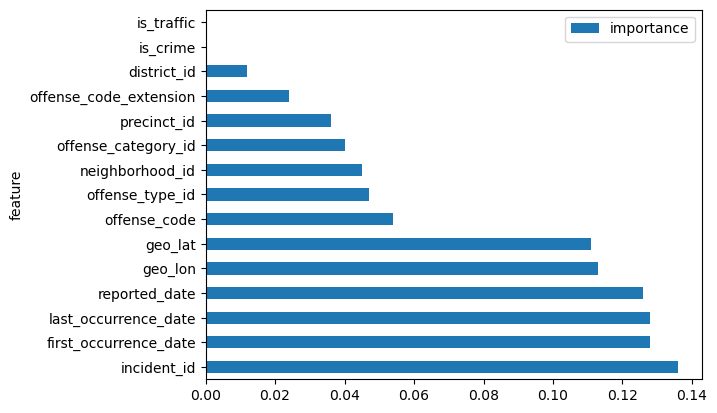

In [32]:
#Visualize the feature importances using bar chart (horizontal)
importances.plot(kind='barh')

In [33]:
#List of top features from feature importances and target (neighborhood_id)

# List of features to exclude
exclude_cols = ['is_traffic', 'is_crime', 'district_id', 'offense_category_id', 'offense_code_extension', 'victim_count']

# List of all columns except the ones to exclude
all_cols = data.columns.tolist()

# List of top features excluding the excluded ones
top_col = [col for col in all_cols if col not in exclude_cols]

top_col

['incident_id',
 'offense_code',
 'offense_type_id',
 'first_occurrence_date',
 'last_occurrence_date',
 'reported_date',
 'geo_lon',
 'geo_lat',
 'precinct_id',
 'neighborhood_id',
 'victim_count_category']

In [34]:
#Create new table based on top features
data_top=data[[c for c in data.columns if c in top_col]]
data_top.head()

,incident_id,offense_code,offense_type_id,first_occurrence_date,last_occurrence_date,reported_date,geo_lon,geo_lat,precinct_id,neighborhood_id,victim_count_category
offense_id,,,,,,,,,,,
202268791299900,202268791,2999,35,73066,79957,101214,-104.998910,39.733957,123,41,0
2021387586299900,2021387586,2999,35,194746,213013,271669,-104.993342,39.746248,611,9,0
2020641486299900,2020641486,2999,35,32943,36043,45656,-105.025520,39.782888,111,7,0
2018612468299900,2018612468,2999,35,238231,260595,333054,-105.025330,39.715357,411,3,0
2020293614299900,2020293614,2999,35,151242,165311,184448,-104.845074,39.783082,521,45,0


In [35]:
#Features using top features
X=data_top.drop('victim_count_category', axis=1)

#Target
y=data_top.victim_count_category

In [36]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Random Forest (Without SMOTE)

              precision    recall  f1-score   support

         low       0.99      1.00      0.99    114571
      medium       0.24      0.05      0.08      1298
        high       0.29      0.09      0.14       191

    accuracy                           0.99    116060
   macro avg       0.51      0.38      0.41    116060
weighted avg       0.98      0.99      0.98    116060



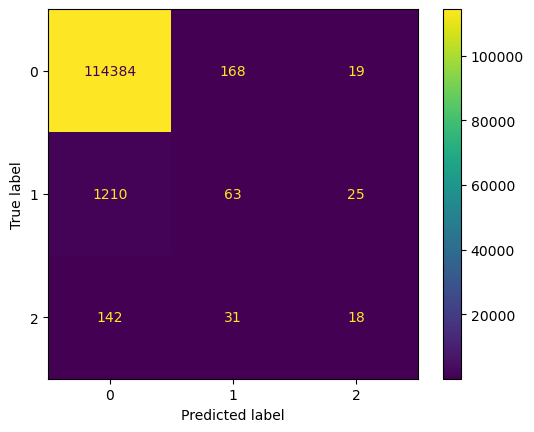

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=42, n_jobs=2)
forest.fit(X_train, y_train)

# Predicting on the test set
y_pred = forest.predict(X_test)

# Print classification report
target_names = ['low', 'medium','high']
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Random Forest (With SMOTE)

              precision    recall  f1-score   support

         low       0.99      0.99      0.99    114571
      medium       0.20      0.15      0.18      1298
        high       0.18      0.18      0.18       191

    accuracy                           0.98    116060
   macro avg       0.46      0.44      0.45    116060
weighted avg       0.98      0.98      0.98    116060



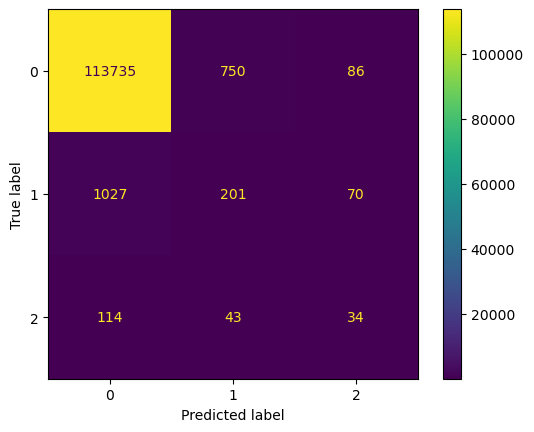

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the RandomForest with SMOTE
forest_SMOTE = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(criterion='gini', n_estimators=25, random_state=42, n_jobs=2))
])

forest_SMOTE.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_SMOTE.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Scaling Data for Logistic Regression

In [39]:
#Scaling the training data

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

### Logistic Regression (Without SMOTE)

              precision    recall  f1-score   support

         low       0.99      1.00      0.99    114571
      medium       0.00      0.00      1.00      1298
        high       1.00      0.00      0.00       191

    accuracy                           0.99    116060
   macro avg       0.66      0.33      0.66    116060
weighted avg       0.98      0.99      0.99    116060



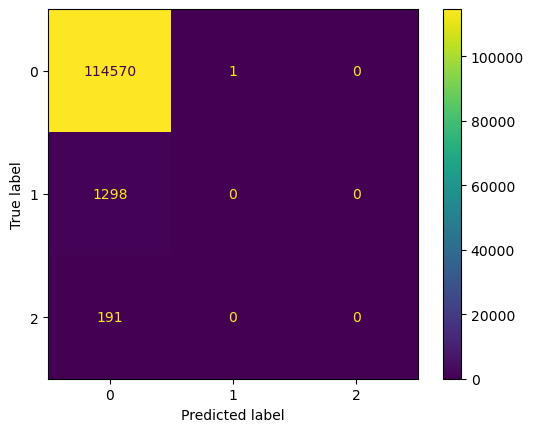

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Create and train the LRModel
LRModel=LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=2000)
LRModel.fit(X_train,y_train)

# Predict on the test set
y_pred=LRModel.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1,target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Logistic Regression (With SMOTE)

              precision    recall  f1-score   support

         low       1.00      0.87      0.93    114571
      medium       0.08      0.60      0.14      1298
        high       0.02      0.62      0.04       191

    accuracy                           0.87    116060
   macro avg       0.37      0.70      0.37    116060
weighted avg       0.99      0.87      0.92    116060



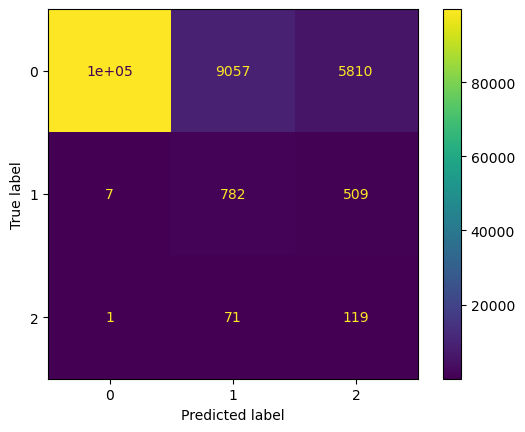

In [41]:
# Define the LR with SMOTE
LRModel_SMOTE = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=2000))
])

LRModel_SMOTE.fit(X_train, y_train)

# Predict on the test set
y_pred = LRModel_SMOTE.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, zero_division=1,target_names=target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Scaling Data for KNN

In [42]:
#Scaling the training data

from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler()
X_train=norm.fit_transform(X_train)
X_test=norm.transform(X_test)

### KNN (Without SMOTE) k = 3

              precision    recall  f1-score   support

         low       0.99      1.00      0.99    114571
      medium       0.18      0.06      0.09      1298
        high       0.21      0.04      0.06       191

    accuracy                           0.99    116060
   macro avg       0.46      0.36      0.38    116060
weighted avg       0.98      0.99      0.98    116060



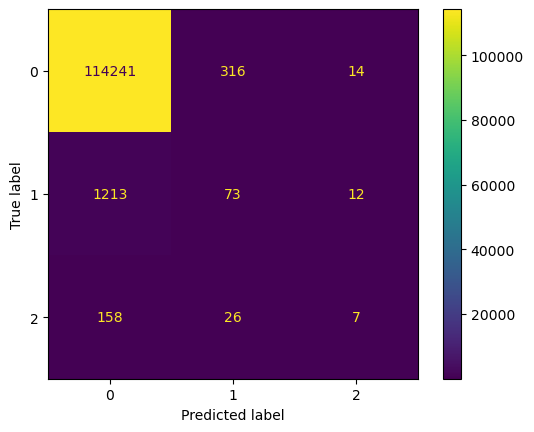

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the LRModel
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### KNN (With SMOTE) k = 3

              precision    recall  f1-score   support

         low       0.99      0.96      0.98    114571
      medium       0.11      0.43      0.18      1298
        high       0.06      0.24      0.09       191

    accuracy                           0.95    116060
   macro avg       0.39      0.54      0.42    116060
weighted avg       0.98      0.95      0.96    116060



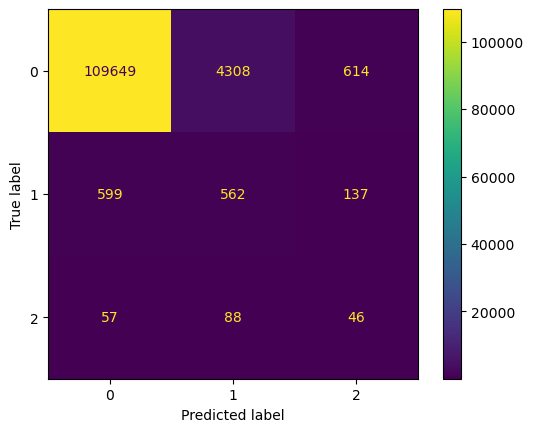

In [44]:
# Define the KNN with SMOTE
knn_SMOTE = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Train model
knn_SMOTE.fit(X_train,y_train)

# Predict on the test set
y_pred = knn_SMOTE.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Finding The Best K Value

In [45]:
from sklearn.metrics import accuracy_score

#Want to find the best K value from 1 to 10

score_list=list()

for k in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train,y_train) #training part
    y_pred=knn.predict(X_test)
    score= accuracy_score(y_test,y_pred)
    
    score_list.append((k,score))
    
Score = pd.DataFrame(score_list,columns=['k_values','accuracy'])
print(Score)

   k_values  accuracy
0         1  0.978649
1         2  0.986171
2         3  0.985016
3         4  0.986740
4         5  0.986309
5         6  0.986852
6         7  0.986800
7         8  0.987067
8         9  0.987041
9        10  0.987110


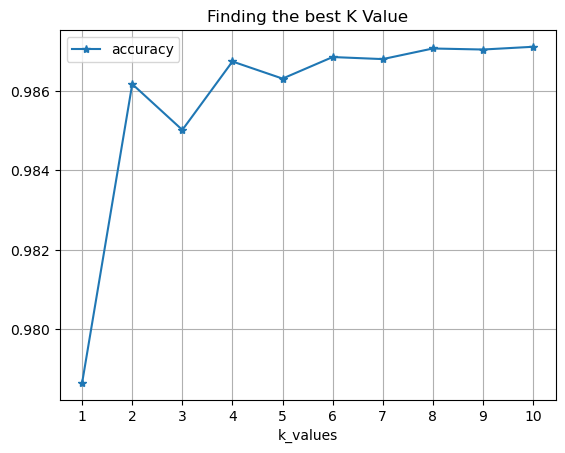

In [46]:
import matplotlib.pyplot as plt

Score.plot(x='k_values', y='accuracy', marker='*')
plt.title('Finding the best K Value')
plt.xticks(Score['k_values'])  
plt.grid()
plt.show()

From the above, we can say that the best k value is 10

### KNN (Without SMOTE) k = 10

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the LRModel
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train,y_train)

# Predict on the test set
y_pred = knn10.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)

              precision    recall  f1-score   support

         low       0.99      1.00      0.99    114571
      medium       0.31      0.01      0.02      1298
        high       0.17      0.01      0.01       191

    accuracy                           0.99    116060
   macro avg       0.49      0.34      0.34    116060
weighted avg       0.98      0.99      0.98    116060



### KNN (With SMOTE) k = 10

In [48]:
# Define the KNN with SMOTE
knn10_SMOTE = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=10))
])

# Train model
knn10_SMOTE.fit(X_train,y_train)

# Predict on the test set
y_pred = knn10_SMOTE.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, zero_division=1,target_names=target_names)
print(report)

              precision    recall  f1-score   support

         low       1.00      0.94      0.97    114571
      medium       0.10      0.56      0.18      1298
        high       0.04      0.29      0.08       191

    accuracy                           0.93    116060
   macro avg       0.38      0.60      0.41    116060
weighted avg       0.98      0.93      0.96    116060



## K-Fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# RandomForest Without SMOTE

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(forest, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.98667763 0.98652253 0.98656906 0.98618112 0.9868015  0.98624316]

Mean cross-validation score: 0.9864991656734866


In [50]:

# RandomForest With SMOTE

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(forest_SMOTE, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.98216446 0.9817302  0.98221099 0.9820246  0.98194705 0.98176094]

Mean cross-validation score: 0.9819730392086882


In [51]:

# Logistic Regression Without SMOTE

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(LRModel, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.98717392 0.98715841 0.98715841 0.98717372 0.98717372 0.98717372]

Mean cross-validation score: 0.9871686506021758


In [52]:

# Logistic Regression With SMOTE

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(LRModel_SMOTE, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.43636589 0.98715841 0.98715841 0.44252989 0.98717372 0.98717372]

Mean cross-validation score: 0.8045933415980028


In [53]:

# KNN Without SMOTE, k = 3

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.9871429  0.98715841 0.98715841 0.9871427  0.98717372 0.98717372]

Mean cross-validation score: 0.9871583110780519


In [54]:

# KNN With SMOTE, k = 3

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_SMOTE, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.9326592  0.93099972 0.9330004  0.93076601 0.93234797 0.93293733]

Mean cross-validation score: 0.9321184384630031


In [55]:

# KNN Without SMOTE, k = 10

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn10, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.9871429  0.98715841 0.98715841 0.9871427  0.98717372 0.98717372]

Mean cross-validation score: 0.9871583110780519


In [56]:

# KNN With SMOTE, k = 10

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn10_SMOTE, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print()
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.90351748 0.90188902 0.90488229 0.90291112 0.90529956 0.90424492]

Mean cross-validation score: 0.9037907308322329
